In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
class ThresholdSwitch():
    def __init__(self,  R_off: float = 1_000_000_000, R_on: float = 1_000, V_th: float = 0.3, V_hold: float = 0.05) -> None:
        self.R_off = R_off
        self.R_on = R_on
        self.V_th =V_th
        self.V_hold =V_hold
        self.state = 'off'

    def get_resistance(self, voltage: float):
        if (self.state == 'off') and (abs(voltage) < self.V_th):
            return self.R_off
        elif (self.state == 'off') and (abs(voltage) > self.V_th):
            self.state = 'on'
            return self.R_on
        elif (self.state == 'on') and (abs(voltage) > self.V_hold):
            return self.R_on
        elif (self.state == 'on') and (abs(voltage) < self.V_hold):
            self.state = 'off'
            return self.R_off

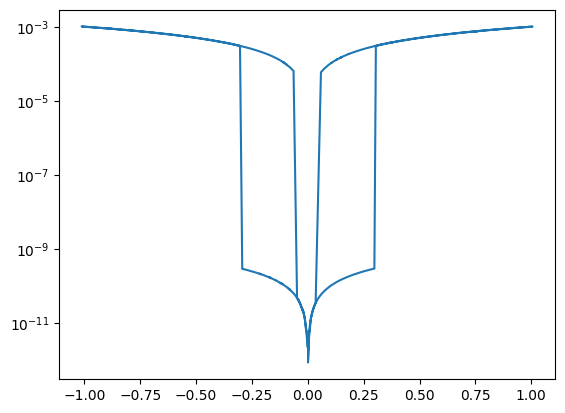

In [18]:
ts = ThresholdSwitch()
t  =np.linspace(0, np.pi, 1000)
V = np.sin(2 * t) + np.array([np.random.normal(0,0.005) for _ in t])
I = np.array([V[i] / ts.get_resistance(V[i]) for i in range(len(t))])

plt.plot(V, np.abs(I))
#plt.plot(t, V)
plt.yscale('log')